<a href="https://colab.research.google.com/github/PIYALI-bhunia/computer-vision/blob/main/testimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [2]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
I=cv2.imread("/content/drive/MyDrive/cv2/i2.jpg",0)

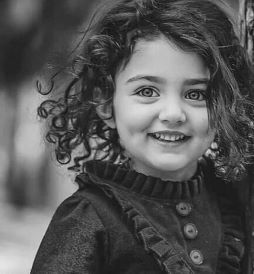

In [5]:
cv2_imshow(I)

# New Section

In [6]:
I.shape

(274, 254)

# New Section

### **Task1:Read an image and convert that to grey if it is color.compute the mean median mode and SD**

In [7]:
from scipy import stats
from statistics import mode

print(f"the mean is:{np.mean(I)}")
print(f"the median is:{np.median(I)}")
print(f"the standard deviation is : {np.std(I)}")
print(f"mode of array:{mode(list(I.flatten()))}")


the mean is:85.95493993907697
the median is:67.0
the standard deviation is : 50.932712719336024
mode of array:36


**Task2: Compute the frequency of each intensity level**

In [8]:
img=list(I.flatten())
freq={}
for i in range(0,256):
  freq[i]=img.count(i)
print(freq)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 1, 13: 1, 14: 2, 15: 2, 16: 7, 17: 7, 18: 5, 19: 17, 20: 21, 21: 35, 22: 33, 23: 55, 24: 81, 25: 121, 26: 193, 27: 310, 28: 533, 29: 761, 30: 749, 31: 776, 32: 785, 33: 859, 34: 868, 35: 897, 36: 1086, 37: 1052, 38: 943, 39: 983, 40: 955, 41: 909, 42: 843, 43: 826, 44: 927, 45: 832, 46: 907, 47: 899, 48: 886, 49: 891, 50: 949, 51: 1085, 52: 1048, 53: 952, 54: 1017, 55: 976, 56: 915, 57: 896, 58: 887, 59: 847, 60: 780, 61: 775, 62: 716, 63: 749, 64: 655, 65: 700, 66: 666, 67: 534, 68: 563, 69: 563, 70: 522, 71: 542, 72: 525, 73: 471, 74: 470, 75: 477, 76: 503, 77: 464, 78: 455, 79: 459, 80: 399, 81: 411, 82: 422, 83: 382, 84: 381, 85: 369, 86: 378, 87: 395, 88: 353, 89: 327, 90: 352, 91: 304, 92: 319, 93: 309, 94: 325, 95: 311, 96: 285, 97: 308, 98: 277, 99: 251, 100: 279, 101: 258, 102: 240, 103: 286, 104: 229, 105: 252, 106: 245, 107: 200, 108: 237, 109: 225, 110: 206, 111: 200, 112: 212, 113: 207, 114: 208

In [9]:
arr=np.zeros((256))
row,col=I.shape
for i in range(row):
  for j in range(col):
    I[i,j]=float(I[i,j])
    arr[I[i,j]]+=1
print(arr.astype(int)) 

[   0    0    0    0    0    0    0    0    0    0    0    0    1    1
    2    2    7    7    5   17   21   35   33   55   81  121  193  310
  533  761  749  776  785  859  868  897 1086 1052  943  983  955  909
  843  826  927  832  907  899  886  891  949 1085 1048  952 1017  976
  915  896  887  847  780  775  716  749  655  700  666  534  563  563
  522  542  525  471  470  477  503  464  455  459  399  411  422  382
  381  369  378  395  353  327  352  304  319  309  325  311  285  308
  277  251  279  258  240  286  229  252  245  200  237  225  206  200
  212  207  208  232  217  186  195  222  219  178  223  194  211  210
  222  213  196  231  214  208  185  181  191  214  188  162  167  181
  157  154  183  137  186  154  137  168  139  151  173  177  164  144
  153  155  140  146  169  166  219  188  164  188  190  194  164  180
  210  230  236  211  224  239  236  264  243  216  210  199  202  244
  235  203  211  228  246  236  214  209  302  315  257  209  149  120
   97 

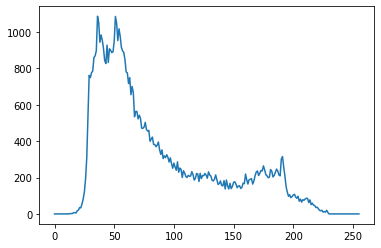

In [10]:
plt.plot(arr)
plt.show()

**Assignment2: **
**Task1: Histogram Equalization**

In [11]:
pixel_intensity=list(set(sorted(I.flatten())))
cdf=[]
for i in range(len(pixel_intensity)):
  if len(cdf)!=0:
    cdf.append(cdf[-1]+arr[pixel_intensity[i]])
  else:
    cdf.append(arr[pixel_intensity[i]])    
pixel_intensity_cdf=dict(zip(pixel_intensity,cdf))
print(pixel_intensity_cdf)


{12: 1.0, 13: 2.0, 14: 4.0, 15: 6.0, 16: 13.0, 17: 20.0, 18: 25.0, 19: 42.0, 20: 63.0, 21: 98.0, 22: 131.0, 23: 186.0, 24: 267.0, 25: 388.0, 26: 581.0, 27: 891.0, 28: 1424.0, 29: 2185.0, 30: 2934.0, 31: 3710.0, 32: 4495.0, 33: 5354.0, 34: 6222.0, 35: 7119.0, 36: 8205.0, 37: 9257.0, 38: 10200.0, 39: 11183.0, 40: 12138.0, 41: 13047.0, 42: 13890.0, 43: 14716.0, 44: 15643.0, 45: 16475.0, 46: 17382.0, 47: 18281.0, 48: 19167.0, 49: 20058.0, 50: 21007.0, 51: 22092.0, 52: 23140.0, 53: 24092.0, 54: 25109.0, 55: 26085.0, 56: 27000.0, 57: 27896.0, 58: 28783.0, 59: 29630.0, 60: 30410.0, 61: 31185.0, 62: 31901.0, 63: 32650.0, 64: 33305.0, 65: 34005.0, 66: 34671.0, 67: 35205.0, 68: 35768.0, 69: 36331.0, 70: 36853.0, 71: 37395.0, 72: 37920.0, 73: 38391.0, 74: 38861.0, 75: 39338.0, 76: 39841.0, 77: 40305.0, 78: 40760.0, 79: 41219.0, 80: 41618.0, 81: 42029.0, 82: 42451.0, 83: 42833.0, 84: 43214.0, 85: 43583.0, 86: 43961.0, 87: 44356.0, 88: 44709.0, 89: 45036.0, 90: 45388.0, 91: 45692.0, 92: 46011.0, 93

In [12]:
hv=[]
for i in cdf:
  hv.append(((round(i-min(cdf))/(row*col - min(cdf)))*255))
pixel_intensity_hv=dict(zip(pixel_intensity,hv))
print(pixel_intensity_hv)

{12: 0.0, 13: 0.0036640563258854807, 14: 0.01099216897765644, 15: 0.018320281629427403, 16: 0.04396867591062576, 17: 0.06961707019182413, 18: 0.08793735182125152, 19: 0.1502263093613047, 20: 0.2271714922048998, 21: 0.3554134636108916, 22: 0.47632732236511244, 23: 0.6778504202888139, 24: 0.9746389826855377, 25: 1.4179897981176808, 26: 2.1251526690135782, 27: 3.2610101300380774, 28: 5.213952151735039, 29: 8.00229901573389, 30: 10.746677203822115, 31: 13.589984912709246, 32: 16.46626912852935, 33: 19.613693512464977, 34: 22.79409440333357, 35: 26.08075292765285, 36: 30.05991809756448, 37: 33.914505352396006, 38: 37.369710467706014, 39: 40.97147783605144, 40: 44.470651627272076, 41: 47.801278827501974, 42: 50.89007831022344, 43: 53.916588835404845, 44: 57.31316904950068, 45: 60.3616639126374, 46: 63.68496300021553, 47: 66.97894963718659, 48: 70.22530354192112, 49: 73.48997772828508, 50: 76.9671671815504, 51: 80.94266829513614, 52: 84.78259932466412, 53: 88.2707809469071, 54: 91.99712623033

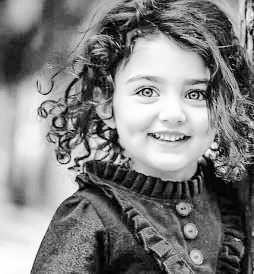

In [13]:
for i in range(row):
  for j in range( col):
    I[i,j]=pixel_intensity_hv[I[i,j]]
    
cv2_imshow(I)


**Task2:Two matrices are given one is a bigger (W) another square of size 3X3 (K). Now we have to implement the following operations to get the resultant matrix R.**

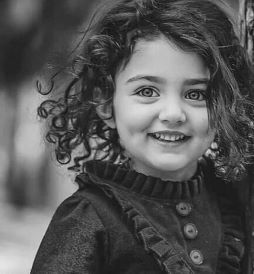

In [14]:
img1=cv2.imread("/content/drive/MyDrive/cv2/i2.jpg",0)
cv2_imshow(img1)

In [15]:
i = int(input("Enter the number of rows and col:"))
  
  
print("Enter the entries in a single line (separated by space): ")
  
entries= list(map(int, input().split()))
  
kernel = np.array(entries).reshape(i, i)
print(kernel)

Enter the number of rows and col:3
Enter the entries in a single line (separated by space): 
-1 -1 -1 -1 8 -1 -1 -1 -1
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [16]:
def multiply(img2,kernel):
  s=0
  k=kernel.shape[0]
  for i in range(k):
     for j in range(k):
       s+=(img2[i,j]*kernel[i,j])
  return s
  
    
def kernel_multiplication(img1,kernel):
  row,col=img1.shape
  newimage=np.zeros((row,col))
  for i in range(1,row-1):
    for j in range(1,col-1):
      newimage[i,j]=multiply(img1[i-1:i+2, j-1:j+2], kernel)
  return newimage

i = int(input("Enter the number of rows and col:"))
print("Enter the entries in a single line (separated by space): ")
entries= list(map(int, input().split()))
kernel = np.array(entries).reshape(i, i)
print(kernel)


array=np.array([[1, 2, 3, 4],
                 [5,6,7,8],
                 [11,3,5,7],
                 [5,6,7,8]])
kernel_multiplication(array,kernel )

Enter the number of rows and col:3
Enter the entries in a single line (separated by space): 
-1 -1 -1 -1 8 -1 -1 -1 -1 
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


array([[  0.,   0.,   0.,   0.],
       [  0.,  11.,  18.,   0.],
       [  0., -28., -12.,   0.],
       [  0.,   0.,   0.,   0.]])

**Cluster an image using K means algorithm**

**1)when k fixed by user**

In [17]:
print(I)
data = I.flatten().astype(np.int)
print(len(data))

[[ 44  50  57 ... 119  33  16]
 [ 53  60  63 ... 133  60  50]
 [ 66  70  76 ... 133  66  70]
 ...
 [254 254 254 ...  66  50 145]
 [254 254 254 ...  70  37 174]
 [254 254 254 ...  70  37 174]]
69596


In [18]:
import math
k = int(input("enter no of cluster : "))
random.seed(10)
centroids_index = random.sample(range(0,len(data)) , k)
print(centroids_index)
centroids = [data[i] for i in centroids_index]
print(f"initital random centroids picked : {centroids}\n")

enter no of cluster : 3
[4270, 56215, 63250]
initital random centroids picked : [88, 119, 247]



In [19]:
def find_min(i, centroid):
    dist_list = [abs(j-i) for j in centroid]
    min_index = np.argmin(dist_list)
    return  min_index, centroid[min_index]

cluster_dict = {}
iter = 0
max_iter = 300

while True:
    old_centroids = centroids.copy()

    # creates initial empty clusters
    for i in range(k):
        cluster_dict[i] = list()

    # pushing all elements inside clusters that is in minimum distance
    for idx, i in enumerate(data):  
        index, val = find_min(i, centroids)
        cluster_dict[index].append(i)
        
    # Updating centroids
    for key, val in cluster_dict.items():
        centroids[key] = sum(val)/len(val)   

    if centroids == old_centroids:
        break   
    iter += 1
    if iter == max_iter:
        break


# Ouput clusters
for key, cluster in cluster_dict.items():
    print(f"cluster {key} --> {cluster}")

cluster 0 --> [44, 50, 57, 63, 73, 70, 57, 57, 57, 57, 57, 60, 63, 70, 73, 70, 70, 70, 73, 76, 80, 84, 70, 60, 60, 60, 76, 1, 73, 60, 40, 50, 73, 84, 53, 30, 22, 40, 53, 63, 66, 76, 80, 53, 19, 47, 80, 73, 33, 16, 53, 60, 63, 70, 80, 84, 66, 57, 60, 57, 57, 57, 60, 63, 70, 73, 70, 70, 70, 73, 76, 80, 53, 30, 16, 13, 44, 84, 63, 0, 3, 44, 57, 40, 26, 16, 13, 19, 40, 66, 33, 47, 44, 22, 19, 44, 76, 84, 84, 53, 60, 50, 66, 70, 76, 80, 84, 76, 66, 57, 63, 60, 57, 57, 57, 60, 66, 70, 70, 70, 70, 73, 76, 84, 80, 84, 53, 57, 53, 84, 2, 30, 26, 33, 44, 40, 26, 26, 37, 30, 76, 84, 80, 84, 80, 76, 70, 63, 57, 26, 57, 76, 44, 66, 70, 76, 80, 84, 80, 73, 66, 60, 66, 63, 60, 57, 57, 60, 63, 66, 70, 70, 73, 73, 76, 84, 30, 80, 80, 57, 80, 80, 70, 44, 30, 73, 44, 57, 76, 70, 73, 76, 80, 73, 66, 63, 70, 76, 84, 84, 76, 66, 73, 84, 53, 60, 76, 80, 84, 80, 73, 70, 63, 66, 63, 60, 57, 57, 60, 63, 66, 73, 73, 73, 76, 80, 84, 66, 84, 63, 80, 63, 80, 50, 63, 57, 30, 0, 44, 22, 22, 53, 63, 47, 57, 84, 76, 73

### **2) When threshold is fixed**



In [20]:
def get_min_index(sid, pixel, threshold):
    diff_arr = [abs(i-pixel) for i in sid]
    index = np.argmin(diff_arr, axis = 0)
    return -1 if diff_arr[index] > threshold else index

def find_min_error(lst1, lst2):
    if len(lst1) != len(lst2):
        return 999999
    diff_arr = [abs(lst1[i]-lst2[i]) for i in range(len(lst1))]
    min_index = np.argmin(diff_arr, axis=0)
    return min_index


cluster_dict = {}
cluster_dict[0] = list()
sid = [data[0]]
last_dict_index = 0
threshold = int(input("Enter threshold value : "))
error = 0.01    ## Error value
iter = 0

while True:
    for cluster_key in cluster_dict.keys():
        cluster_dict[cluster_key] = list()

    old_sid = sid.copy()
    for pixel in data:
        index = get_min_index(sid, pixel, threshold)  #index is the cluster key in cluster_dict as well as the minimum sid from the sid array  -1 for nw cluster
        
        if index == -1:
            last_dict_index += 1
            cluster_dict[last_dict_index] = list()
            cluster_dict[last_dict_index].append(pixel)
            sid.append(pixel)
        else:
            cluster_dict[index].append(pixel)
            sid[index] = (sid[index]+pixel)/2
    min_error = find_min_error(old_sid, sid)
    iter += 1

    if min_error < error:
        break        

print(sid)
for key, val in cluster_dict.items():
    print(f"cluster - {key} --->  {val}")

Enter threshold value : 10
[84.0, 90.23496096856022, 95.04102407000347, 103.1498037467637, 109.31844923844918, 114.28986118634873, 131.63910879480392, 141.72716644325843, 136.50866226950677, 120.79869976687978, 35.31451945989973, 72.00147913468604, 52.295324044282935, 151.38612274901863, 167.3742126157929, 57.29017943534123, 80.0, 156.54056114532685, 161.8854268686795, 43.45346137939238, 236.27801093182427, 64.80192340537906, 175.29965853721683, 188.70851298773977, 241.08624437698518, 27.939666754131395, 21.703773315345202, 246.09615456659952, 249.44122717967844, 13.675379623750668, 239.8707939587477, 251.04514831997233, 215.12482013987827, 204.36857400020767, 181.66358752187926, 8.263676692819276, 225.46830333812562, 3.619204200331064]
cluster - 0 --->  [84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84

### **3)Adaptive Threshold**

In [21]:
def get_min_index(sid, pixel, threshold):
    diff_arr = [abs(i-pixel) for i in sid]
    index = np.argmin(diff_arr, axis = 0)
    return -1 if diff_arr[index] > threshold else index

def find_min_error(lst1, lst2):
    if len(lst1) != len(lst2):
        return 999999
    diff_arr = [abs(lst1[i]-lst2[i]) for i in range(len(lst1))]
    min_index = np.argmin(diff_arr, axis=0)
    return min_index


cluster_dict = {}
cluster_dict[0] = list()
sid = [data[0]]
last_dict_index = 0

threshold = np.std(np.array(data).flatten())
print(threshold)
error = 0.01
iter = 0

while True:
    for cluster_key in cluster_dict.keys():
        cluster_dict[cluster_key] = list()

    old_sid = sid.copy()
    for pixel in data:
        index = get_min_index(sid, pixel, threshold)  #index is the cluster key in cluster_dict as well as the minimum sid from the sid array  -1 for nw cluster
        
        if index == -1:
            last_dict_index += 1
            cluster_dict[last_dict_index] = list()
            cluster_dict[last_dict_index].append(pixel)
            sid.append(pixel)
        else:
            cluster_dict[index].append(pixel)
            sid[index] = (sid[index]+pixel)/2
    min_error = find_min_error(old_sid, sid)
    iter += 1

    if min_error < error:
        break        

print(sid)
for key, val in cluster_dict.items():
    print(f"cluster - {key} --->  {val}")

73.13602409052223
[162.00365331028257, 103.07793704367404, 60.988480926609306, 28.838973969337772, 249.1104181075362]
cluster - 0 --->  [151, 159, 167, 172, 177, 179, 182, 188, 191, 192, 192, 194, 195, 194, 195, 195, 195, 195, 195, 192, 188, 185, 182, 180, 177, 174, 170, 165, 158, 152, 145, 145, 145, 145, 144, 142, 138, 142, 149, 153, 155, 156, 162, 170, 174, 173, 170, 177, 183, 184, 181, 180, 180, 180, 170, 177, 179, 172, 166, 167, 170, 172, 177, 172, 163, 153, 156, 173, 177, 182, 188, 188, 177, 185, 188, 163, 156, 158, 168, 169, 170, 166, 159, 152, 151, 152, 152, 142, 144, 145, 167, 177, 181, 175, 167, 169, 177, 181, 172, 177, 168, 152, 168, 191, 191, 176, 180, 180, 175, 165, 158, 158, 155, 149, 151, 145, 153, 144, 140, 145, 163, 197, 202, 202, 211, 216, 196, 186, 177, 177, 180, 173, 163, 172, 178, 180, 181, 180, 180, 176, 179, 198, 191, 182, 173, 170, 172, 168, 162, 195, 199, 204, 216, 218, 193, 195, 195, 195, 196, 197, 196, 197, 196, 196, 196, 195, 193, 183, 180, 173, 179, 180, 180

## **Q)How can we extract key frame from a video?**

 The key frame selected is based on the threshold we select.we compute threshold as the summation of mean of absolute difference (histogram difference between 2 consecutive frames ) and standard deviation of absolute difference. If it is greater than threshold than we select the first frame in the difference to be the key frame.
One of the method select key-frame is using difference of histogram of consecutive frames.

# **Q)How to model the background?**

Background modeling is an efficient way to obtain foreground objects. Though background modeling methods for foreground detection have been studied for several decades. The purpose of background modeling is to remove interference from the background and to detect and extract the foreground moving target, to meet the needs of video surveillance. Classic foreground detection algorithms, such as frame difference, optical flow, and background subtraction, are implemented mainly through extracting interframe motion information, detecting optical flow change or background modeling.The general steps of these background modeling methods are as follows: First, set up a background model by using the first of first few frames of the video. Second, compare the background model to the current frame to obtain the foreground object. Finally, update the background model.

# Some background methods are given below 

1> Gaussian mixture model (GMM).

2> Kernel density estimator (KDE).

4> Adaptive Gaussian mixture model (AGMM).

5> Consensus-based method (SACON).

**In these types of methods we can model the background.** 

1> Dynamic Background and Static Background Segmentation.

2> Dynamic Background Modeling with Kernel Density Estimation.

## **Q)How to extract the foreground?**
Foreground detection is one of the major tasks in the field of computer vision and image processing whose aim is to detect changes in image sequences. Background subtraction is any technique which allows an image's foreground to be extracted for further processing (object recognition etc.). Background subtraction is a widely used approach for detecting moving objects in videos from static cameras. The rationale in the approach is that of detecting the moving objects from the difference between the current frame and a reference frame, often called "background image", or "background model". Background subtraction is mostly done if the image in question is a part of a video stream.

Background subtraction is generally based on a static background hypothesis which is often not applicable in real environments. With indoor scenes, reflections or animated images on screens lead to background changes. Similarly, due to wind, rain or illumination changes brought by weather, static backgrounds methods have difficulties with outdoor scenes